In [1]:
%load_ext autoreload
%autoreload 2

In [197]:
from wdtools import *

In [3]:
# this can take about 9 - 11 minutes
start = time.time()
all_taxlot = combine_taxlot()
end = time.time()
print(f'it took {round((end - start)/60, 0)} minutes to complete')

it took 9.0 minutes to complete


In [4]:
setID = 'Set005'; nm_to_add = 3932

In [6]:
wd = combine_wd_tables(setID=setID, nm_to_add=nm_to_add)

In [405]:
df = pd.DataFrame(columns = ['wetdet_delin_number', 'record_ID', 'field', 'cor_type', 'from', 'to'])

In [406]:
#ml = 'N'
ml = 'Y'

In [398]:
notes = pd.read_csv(os.path.join(inpath + '\\output\\to_review\\', f'review_unmatched_{setID}_r2_{ml}_0.csv'))

In [366]:
notes.wetdet_delin_number.unique()

array(['WD2021-0038', 'WD2018-0169', 'WD2021-0410', 'WD2019-0609',
       'WD2019-0213', 'WD2019-0444', 'WD2020-0171', 'WD2020-0358'],
      dtype=object)

In [11]:
notes.columns

Index(['wetdet_delin_number', 'trsqq', 'parcel_id', 'county', 'latitude',
       'longitude', 'DecisionLink', 'record_ID', 'IDyear', 'correct_type',
       'correction', 'cor_trsqq', 'ORTaxlot'],
      dtype='object')

In [365]:
notes.shape

(8, 13)

In [367]:
notes

,wetdet_delin_number,trsqq,parcel_id,county,latitude,longitude,DecisionLink,record_ID,IDyear,correct_type,correction,cor_trsqq,ORTaxlot
0,WD2021-0038,04S39E06,2500,Union,45.241586,-117.985814,https://docs.dsl.state.or.us/PublicReview/docv...,4263,2021,section number,from 06 to 00,04S39E0000,3104.00S39.00E0000--000002500
1,WD2018-0169,06S08E12D,400p,Polk,45.062693,-123.608810,https://docs.dsl.state.or.us/PublicReview/docv...,4036,2018,township direction and range direction,from S and E to N and W,06N08W12D0,2706.00N08.00W12D0--000000400
2,WD2021-0410,4N29E0A,"200p,300p",Umatilla,45.849426,-119.239912,https://docs.dsl.state.or.us/PublicReview/Elec...,4291,2021,to review,"some lots are not matched, need to review trsq...",04N29E06C0,3004.00N29.00E06C0--000004601
3,WD2019-0609,05N28E13,"1700,1800",Umatilla,45.920580,-119.254120,https://docs.dsl.state.or.us/PublicReview/Elec...,4167,2019,range direction and section number,from E and 13 to EA and 0,05N28EA000,3005.00N28.00EA000--000001800
4,WD2019-0213,07S22E20,2101,Wheeler,44.936798,-120.123687,https://docs.dsl.state.or.us/PublicReview/Elec...,4128,2019,section number,from 20 to 00,07S22E0000,3507.00S22.00E0000--000002101
5,WD2019-0444,04N29E32B,1102,Umatilla,45.787025,-119.221502,https://docs.dsl.state.or.us/PublicReview/docv...,4147,2019,QQ,from B0 to 00,04N29E3200,3004.00N29.00E3200--000001102
6,WD2020-0171,05S23E31BC,"2600,2500,2400,1100,800,ROW",Gilliam,45.089165,-119.885209,https://docs.dsl.state.or.us/PublicReview/Elec...,4202,2020,range number,from 23 to 24,05S24E31BC,1105.00S24.00E31BC--000002600
7,WD2020-0358,03S40E16,302,Union,45.296042,-117.820711,https://docs.dsl.state.or.us/PublicReview/Elec...,4233,2020,section number,from 16 to 21,03S40E2100,3103.00S40.00E2100--000000200


In [370]:
i=6

In [372]:
i = i+1

In [369]:
i

7

In [373]:
notes.loc[i, ['wetdet_delin_number', 'record_ID', 'trsqq', 'county', 'correct_type', 
              'correction', 'cor_trsqq', 'parcel_id', 'ORTaxlot']]

wetdet_delin_number                      WD2020-0358
record_ID                                       4233
trsqq                                       03S40E16
county                                         Union
correct_type                          section number
correction                             from 16 to 21
cor_trsqq                                 03S40E2100
parcel_id                                        302
ORTaxlot               3103.00S40.00E2100--000000200
Name: 7, dtype: object

In [31]:
notes.columns

Index(['wetdet_delin_number', 'trsqq', 'parcel_id', 'county', 'latitude',
       'longitude', 'DecisionLink', 'record_ID', 'IDyear', 'correct_type',
       'correction', 'cor_trsqq', 'ORTaxlot'],
      dtype='object')

In [46]:
print(notes.loc[1, 'DecisionLink'])

https://docs.dsl.state.or.us/PublicReview/ElectronicFile.aspx?docid=3918190&dbid=0


In [374]:
print(notes.loc[i, ['wetdet_delin_number', 'correction']])

wetdet_delin_number      WD2020-0358
correction             from 16 to 21
Name: 7, dtype: object


In [381]:
wdID = notes.loc[i,'wetdet_delin_number']

In [399]:
wdID = 'WD2020-0012'

In [377]:
url = wd.loc[wd.wetdet_delin_number == wdID, 'DecisionLink'].values[0]
webbrowser.open(url)

True

<AxesSubplot:>

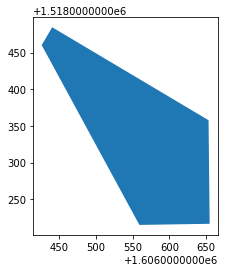

In [20]:
all_taxlot[all_taxlot.ORTaxlot==notes.loc[i,'ORTaxlot']].plot()

In [401]:
selcols = ['wetdet_delin_number', 'county', 'trsqq', 'parcel_id', 'latitude', 'longitude', 'record_ID', 'notes']
wd.loc[wd.wetdet_delin_number == wdID, selcols]

,wetdet_delin_number,county,trsqq,parcel_id,latitude,longitude,record_ID,notes
255,WD2020-0012,Union,02S38E35,1100,45.334287,-118.046058,4188,
256,WD2020-0012,Union,03S38E03,"200,300,3400,1600,1400,1300,",45.334287,-118.046058,4189,
257,WD2020-0012,Union,03S38E03,"1100,1000,700,800,3100,3200,",45.334287,-118.046058,4190,
258,WD2020-0012,Union,03S38E03,2108,45.334287,-118.046058,4191,
259,WD2020-0012,Union,02S38E34,"600,700,900,1200,2103",45.334287,-118.046058,4192,


In [400]:
lon=wd.loc[wd.wetdet_delin_number == wdID, 'longitude'].values[0]
lat=wd.loc[wd.wetdet_delin_number == wdID, 'latitude'].values[0]
get_point_from_lonlat(lon=lon, lat=lat)

,Longitude,Latitude,geometry
0,-118.046058,45.334287,POINT (1943298.673 1315946.603)


In [225]:
wd_pt  = get_point_from_lonlat(lon = lon, lat = lat)

In [99]:
taxlot = all_taxlot

In [226]:
year = 2021

In [227]:
tID = extract_taxlot_info(wd_pt = wd_pt, taxlot = taxlot, year = year)

In [228]:
tID

'3004.00N29.00E06C0--000004601'

In [385]:
ctyp = notes.loc[i,'correct_type']#.split(' and ')[1]
ctyp

'section number'

In [85]:
ctyp = 'QQ'

In [386]:
crt = notes.loc[i,'correction']
crt

'from 16 to 21'

In [387]:
ft = crt.split('from ')[1].split(' to ')
ft

['16', '21']

In [86]:
ft = ['1N1E33AC', '01N01E33AC']

In [73]:
ft[0] = '00'

In [38]:
ft[1] = 'DB'

In [39]:
ft

['Multnomah', 'Washington']

In [517]:
f = crt.split('from ')[1].split(' and ')[0]
t = crt.split(' to ')[1].split(' and ')[0]

In [523]:
f = crt.split(' and ')[1].split(' to ')[0]
t = crt.split(' and ')[2]

In [524]:
print(f, t)

Q VE


In [390]:
rID = notes.loc[i,'record_ID']
rID

4233

In [391]:
df = pd.read_csv(os.path.join(inpath + '\\output\\to_review\\', f'unmatched_df_{setID}_r2_{ml}_notes.csv'))

In [307]:
df = df.append({'wetdet_delin_number': 'WD2019-0487', 'record_ID': rID, 'field': 'trsqq', 'cor_type': ctyp, 'from': ft[0], 'to': ft[1]},
        ignore_index = True)

In [361]:
df = df.append({'wetdet_delin_number': wdID, 'record_ID': rID, 'field': 'trsqq', 'cor_type': 'section number', 'from': '01', 'to': '1'},
        ignore_index = True)

In [392]:
df = df.append({'wetdet_delin_number': wdID, 'record_ID': rID, 'field': 'trsqq', 'cor_type': ctyp, 'from': ft[0], 'to': ft[1]},
        ignore_index = True)

In [189]:
df = df.append({'wetdet_delin_number': wdID, 'record_ID': rID, 'field': 'county', 'cor_type': 'county', 'from': ft[0], 'to': ft[1]},
        ignore_index = True)

In [255]:
df = df.append({'wetdet_delin_number': wdID, 'record_ID': rID, 'field': 'parcel_id', 'cor_type': 'parcel id', 'from': '200p,300p', 'to': '300p'},
        ignore_index = True)

In [525]:
df = df.append({'wetdet_delin_number': wdID, 'record_ID': rID, 'field': 'trsqq', 'cor_type': ctyp, 'from': f, 'to': t},
        ignore_index = True)

In [597]:
df = df.append({'wetdet_delin_number': wdID, 'record_ID': rID, 'field': 'county', 'cor_type': 'county', 'from': 'Benton', 'to': 'Polk'},
        ignore_index = True)

In [393]:
df

,wetdet_delin_number,record_ID,field,cor_type,from,to
0,WD2021-0410,4290,parcel_id,parcel id,"101,500,600,All part","101,200,500,600,All part"
1,WD2021-0410,4291,parcel_id,parcel id,"200p,300p",300p
2,WD2021-0038,4263,trsqq,section number,6,0
3,WD2018-0169,4036,trsqq,township direction,S,N
4,WD2018-0169,4036,trsqq,range direction,E,W
5,WD2019-0609,4167,trsqq,range direction,E,EA
6,WD2019-0609,4167,trsqq,section number,13,0
7,WD2019-0213,4128,trsqq,section number,20,0
8,WD2019-0444,4147,trsqq,QQ,B0,0
9,WD2020-0171,4202,trsqq,range number,23,24


In [169]:
df.head()

,wetdet_delin_number,record_ID,field,cor_type,from,to
0,WD2021-0038,4263,trsqq,section number,06,00


In [70]:
df.loc[2, 'field'] = 'parcel_id'

In [394]:
df.to_csv(os.path.join(inpath + '\\output\\to_review\\', f'unmatched_df_{setID}_r2_{ml}_notes.csv'), index=False)

In [171]:
df.shape

(1, 6)

In [402]:
r1df = pd.read_csv(os.path.join(inpath + f'\\output\\to_review\\unmatched_df_{setID}_r1_N.csv'))

In [215]:
r1df.columns

Index(['wetdet_delin_number', 'trsqq', 'parcel_id', 'address_location_desc',
       'city', 'county', 'site_name', 'site_desc', 'latitude', 'longitude',
       'DocumentName', 'DecisionLink', 'is_batch_file', 'status_name',
       'received_date', 'Coord-Source', 'response_date',
       'reissuance_response_date', 'project_id', 'site_id', 'record_ID',
       'notes', 'recyear', 'IDyear', 'missinglot'],
      dtype='object')

In [403]:
wdIDs = r1df.wetdet_delin_number.unique()

In [404]:
i = 0

In [409]:
i = i + 1

In [89]:
i

5

In [433]:
df = pd.read_csv(os.path.join(inpath + '\\output\\to_review\\', f'unmatched_df_{setID}_r1_{ml}_notes.csv'))

In [410]:
r1df.loc[r1df.wetdet_delin_number == wdIDs[i], ['wetdet_delin_number', 'trsqq', 'parcel_id', 'county', 
                                                'latitude', 'longitude', 'record_ID']]

,wetdet_delin_number,trsqq,parcel_id,county,latitude,longitude,record_ID
4,WD2019-0561,05N28E13,"1900, 2000, 2100",Umatilla,45.920360,-119.247976,4155
5,WD2019-0561,05N29E18,600,Umatilla,45.920103,-119.237708,4156


In [411]:
url = r1df.loc[r1df.wetdet_delin_number == wdIDs[i], 'DecisionLink'].values[0]
if str(url) == 'nan':
    print('Decision link is not available')
else:
    webbrowser.open(url)

In [417]:
j=0

In [413]:
sel = r1df.wetdet_delin_number == wdIDs[i]

In [425]:
j = j + 1

In [427]:
j

1

In [428]:
crt = review_wd_record_w_coord(wd_id=wdIDs[i], 
                         county_to_check=r1df.loc[sel, 'county'].values[j], 
                         trsqq_to_check=r1df.loc[sel, 'trsqq'].values[j], 
                         parcel_IDs_to_check=r1df.loc[sel, 'parcel_id'].values[j], 
                         lon=r1df.loc[sel, 'longitude'].values[j], 
                         lat=r1df.loc[sel, 'latitude'].values[j], 
                         taxlot=all_taxlot, 
                         year=r1df.loc[sel, 'IDyear'].values[j])
print(crt)

reviewing WD2019-0561
all lots are matched...
corrected trsqq...
('range direction and section number', 'from E and 18 to EB and 0')


In [419]:
crt

('range direction and section number', 'from E and 13 to EA and 0')

In [415]:
corrected_trsqq = '05N29EB0'

In [416]:
corrected_trsqq in trsqq

True

In [27]:
txid = create_ORTaxlot(cnt_code=cnt_dict[r1df.loc[sel, 'county'].values[j]], 
                trsqq=corrected_trsqq, 
                lot=r1df.loc[sel, 'parcel_id'].values[j])

In [29]:
txid in all_taxlot.ORTaxlot.values

True

<AxesSubplot:>

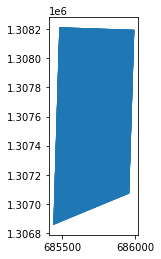

In [30]:
all_taxlot[all_taxlot.ORTaxlot==txid].plot()

In [59]:
df = pd.DataFrame(columns = ['wetdet_delin_number', 'record_ID', 'field', 'cor_type', 'from', 'to'])

In [80]:
ft = crt[1].split('from ')[1].split(' to ')
print(ft)

['00', 'B0']


In [73]:
wdIDs[i]

'WD2020-0195'

In [434]:
df = df.append({'wetdet_delin_number': wdIDs[i],
                'record_ID': r1df.loc[sel, 'record_ID'].values[j],
                'field': 'trsqq', 
                'cor_type': 'section number', 
                'from': 18, 
                'to': 0},
        ignore_index = True)

In [86]:
df = df.append({'wetdet_delin_number': wdIDs[i],
                'record_ID': r1df.loc[sel, 'record_ID'].values[j],
                'field': 'trsqq', 
                'cor_type': crt[0], 
                'from': ft[0], 
                'to': ft[1]},
        ignore_index = True)

In [435]:
df

,wetdet_delin_number,record_ID,field,cor_type,from,to
0,WD2019-0561,4155,trsqq,range direction,E,EA
1,WD2019-0561,4155,trsqq,section number,13,0
2,WD2019-0561,4156,trsqq,range direction,E,EB
3,WD2019-0561,4156,trsqq,section number,18,0


In [431]:
ml = 'N'

In [436]:
df.to_csv(os.path.join(inpath + '\\output\\to_review\\', f'unmatched_df_{setID}_r1_{ml}_notes.csv'), index=False)